In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [4]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

### TODOS JUNTOS

In [5]:
LQ800_results_16bins_beta = np.loadtxt('saved-results/LQdown800GeV.txt')[0]
LQ800_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown800GeV.txt')[1]
LQ800_results_16bins_beta_min = np.loadtxt('saved-results/LQdown800GeV.txt')[2]

LQ800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown800GeV.txt')[9]
LQ800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown800GeV.txt')[10]
LQ800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown800GeV.txt')[11]

In [6]:
LQ1000_results_16bins_beta = np.loadtxt('saved-results/LQdown1000GeV.txt')[0]
LQ1000_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1000GeV.txt')[1]
LQ1000_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1000GeV.txt')[2]

LQ1000_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1000GeV.txt')[9]
LQ1000_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1000GeV.txt')[10]
LQ1000_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1000GeV.txt')[11]

In [7]:
LQ1200_results_16bins_beta = np.loadtxt('saved-results/LQdown1200GeV.txt')[0]
LQ1200_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1200GeV.txt')[1]
LQ1200_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1200GeV.txt')[2]

LQ1200_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1200GeV.txt')[9]
LQ1200_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1200GeV.txt')[10]
LQ1200_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1200GeV.txt')[11]

In [8]:
LQ1400_results_16bins_beta = np.loadtxt('saved-results/LQdown1400GeV.txt')[0]
LQ1400_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1400GeV.txt')[1]
LQ1400_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1400GeV.txt')[2]

LQ1400_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1400GeV.txt')[9]
LQ1400_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1400GeV.txt')[10]
LQ1400_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1400GeV.txt')[11]

In [9]:
LQ1600_results_16bins_beta = np.loadtxt('saved-results/LQdown1600GeV.txt')[0]
LQ1600_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1600GeV.txt')[1]
LQ1600_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1600GeV.txt')[2]

LQ1600_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1600GeV.txt')[9]
LQ1600_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1600GeV.txt')[10]
LQ1600_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1600GeV.txt')[11]

In [10]:
LQ1800_results_16bins_beta = np.loadtxt('saved-results/LQdown1800GeV.txt')[0]
LQ1800_results_16bins_beta_plus = np.loadtxt('saved-results/LQdown1800GeV.txt')[1]
LQ1800_results_16bins_beta_min = np.loadtxt('saved-results/LQdown1800GeV.txt')[2]

LQ1800_results_MLL_KDE_beta = np.loadtxt('saved-results/LQdown1800GeV.txt')[9]
LQ1800_results_MLL_KDE_beta_plus = np.loadtxt('saved-results/LQdown1800GeV.txt')[10]
LQ1800_results_MLL_KDE_beta_min = np.loadtxt('saved-results/LQdown1800GeV.txt')[11]

In [11]:
results_16bins_beta00 = [LQ800_results_16bins_beta[0],LQ1000_results_16bins_beta[0],LQ1200_results_16bins_beta[0],LQ1400_results_16bins_beta[0],LQ1600_results_16bins_beta[0],LQ1800_results_16bins_beta[0]]
results_16bins_plus_beta00 = [LQ800_results_16bins_beta_plus[0],LQ1000_results_16bins_beta_plus[0],LQ1200_results_16bins_beta_plus[0],LQ1400_results_16bins_beta_plus[0],LQ1600_results_16bins_beta_plus[0],LQ1800_results_16bins_beta_plus[0]]
results_16bins_min_beta00 = [LQ800_results_16bins_beta_min[0],LQ1000_results_16bins_beta_min[0],LQ1200_results_16bins_beta_min[0],LQ1400_results_16bins_beta_min[0],LQ1600_results_16bins_beta_min[0],LQ1800_results_16bins_beta_min[0]]

results_MLL_KDE_beta00 = [LQ800_results_MLL_KDE_beta[0],LQ1000_results_MLL_KDE_beta[0],LQ1200_results_MLL_KDE_beta[0],LQ1400_results_MLL_KDE_beta[0],LQ1600_results_MLL_KDE_beta[0],LQ1800_results_MLL_KDE_beta[0]]
results_MLL_KDE_plus_beta00 = [LQ800_results_MLL_KDE_beta_plus[0],LQ1000_results_MLL_KDE_beta_plus[0],LQ1200_results_MLL_KDE_beta_plus[0],LQ1400_results_MLL_KDE_beta_plus[0],LQ1600_results_MLL_KDE_beta_plus[0],LQ1800_results_MLL_KDE_beta_plus[0]]
results_MLL_KDE_min_beta00 = [LQ800_results_MLL_KDE_beta_min[0],LQ1000_results_MLL_KDE_beta_min[0],LQ1200_results_MLL_KDE_beta_min[0],LQ1400_results_MLL_KDE_beta_min[0],LQ1600_results_MLL_KDE_beta_min[0],LQ1800_results_MLL_KDE_beta_min[0]]


results_16bins_beta01 = [LQ800_results_16bins_beta[1],LQ1000_results_16bins_beta[1],LQ1200_results_16bins_beta[1],LQ1400_results_16bins_beta[1],LQ1600_results_16bins_beta[1],LQ1800_results_16bins_beta[1]]
results_16bins_plus_beta01 = [LQ800_results_16bins_beta_plus[1],LQ1000_results_16bins_beta_plus[1],LQ1200_results_16bins_beta_plus[1],LQ1400_results_16bins_beta_plus[1],LQ1600_results_16bins_beta_plus[1],LQ1800_results_16bins_beta_plus[1]]
results_16bins_min_beta01 = [LQ800_results_16bins_beta_min[1],LQ1000_results_16bins_beta_min[1],LQ1200_results_16bins_beta_min[1],LQ1400_results_16bins_beta_min[1],LQ1600_results_16bins_beta_min[1],LQ1800_results_16bins_beta_min[1]]

results_MLL_KDE_beta01 = [LQ800_results_MLL_KDE_beta[1],LQ1000_results_MLL_KDE_beta[1],LQ1200_results_MLL_KDE_beta[1],LQ1400_results_MLL_KDE_beta[1],LQ1600_results_MLL_KDE_beta[1],LQ1800_results_MLL_KDE_beta[1]]
results_MLL_KDE_plus_beta01 = [LQ800_results_MLL_KDE_beta_plus[1],LQ1000_results_MLL_KDE_beta_plus[1],LQ1200_results_MLL_KDE_beta_plus[1],LQ1400_results_MLL_KDE_beta_plus[1],LQ1600_results_MLL_KDE_beta_plus[1],LQ1800_results_MLL_KDE_beta_plus[1]]
results_MLL_KDE_min_beta01 = [LQ800_results_MLL_KDE_beta_min[1],LQ1000_results_MLL_KDE_beta_min[1],LQ1200_results_MLL_KDE_beta_min[1],LQ1400_results_MLL_KDE_beta_min[1],LQ1600_results_MLL_KDE_beta_min[1],LQ1800_results_MLL_KDE_beta_min[1]]


results_16bins_beta03 = [LQ800_results_16bins_beta[2],LQ1000_results_16bins_beta[2],LQ1200_results_16bins_beta[2],LQ1400_results_16bins_beta[2],LQ1600_results_16bins_beta[2],LQ1800_results_16bins_beta[2]]
results_16bins_plus_beta03 = [LQ800_results_16bins_beta_plus[2],LQ1000_results_16bins_beta_plus[2],LQ1200_results_16bins_beta_plus[2],LQ1400_results_16bins_beta_plus[2],LQ1600_results_16bins_beta_plus[2],LQ1800_results_16bins_beta_plus[2]]
results_16bins_min_beta03 = [LQ800_results_16bins_beta_min[2],LQ1000_results_16bins_beta_min[2],LQ1200_results_16bins_beta_min[2],LQ1400_results_16bins_beta_min[2],LQ1600_results_16bins_beta_min[2],LQ1800_results_16bins_beta_min[2]]

results_MLL_KDE_beta03 = [LQ800_results_MLL_KDE_beta[2],LQ1000_results_MLL_KDE_beta[2],LQ1200_results_MLL_KDE_beta[2],LQ1400_results_MLL_KDE_beta[2],LQ1600_results_MLL_KDE_beta[2],LQ1800_results_MLL_KDE_beta[2]]
results_MLL_KDE_plus_beta03 = [LQ800_results_MLL_KDE_beta_plus[2],LQ1000_results_MLL_KDE_beta_plus[2],LQ1200_results_MLL_KDE_beta_plus[2],LQ1400_results_MLL_KDE_beta_plus[2],LQ1600_results_MLL_KDE_beta_plus[2],LQ1800_results_MLL_KDE_beta_plus[2]]
results_MLL_KDE_min_beta03 = [LQ800_results_MLL_KDE_beta_min[2],LQ1000_results_MLL_KDE_beta_min[2],LQ1200_results_MLL_KDE_beta_min[2],LQ1400_results_MLL_KDE_beta_min[2],LQ1600_results_MLL_KDE_beta_min[2],LQ1800_results_MLL_KDE_beta_min[2]]


results_16bins_beta05 = [LQ800_results_16bins_beta[3],LQ1000_results_16bins_beta[3],LQ1200_results_16bins_beta[3],LQ1400_results_16bins_beta[3],LQ1600_results_16bins_beta[3],LQ1800_results_16bins_beta[3]]
results_16bins_plus_beta05 = [LQ800_results_16bins_beta_plus[3],LQ1000_results_16bins_beta_plus[3],LQ1200_results_16bins_beta_plus[3],LQ1400_results_16bins_beta_plus[3],LQ1600_results_16bins_beta_plus[3],LQ1800_results_16bins_beta_plus[3]]
results_16bins_min_beta05 = [LQ800_results_16bins_beta_min[3],LQ1000_results_16bins_beta_min[3],LQ1200_results_16bins_beta_min[3],LQ1400_results_16bins_beta_min[3],LQ1600_results_16bins_beta_min[3],LQ1800_results_16bins_beta_min[3]]

results_MLL_KDE_beta05 = [LQ800_results_MLL_KDE_beta[3],LQ1000_results_MLL_KDE_beta[3],LQ1200_results_MLL_KDE_beta[3],LQ1400_results_MLL_KDE_beta[3],LQ1600_results_MLL_KDE_beta[3],LQ1800_results_MLL_KDE_beta[3]]
results_MLL_KDE_plus_beta05 = [LQ800_results_MLL_KDE_beta_plus[3],LQ1000_results_MLL_KDE_beta_plus[3],LQ1200_results_MLL_KDE_beta_plus[3],LQ1400_results_MLL_KDE_beta_plus[3],LQ1600_results_MLL_KDE_beta_plus[3],LQ1800_results_MLL_KDE_beta_plus[3]]
results_MLL_KDE_min_beta05 = [LQ800_results_MLL_KDE_beta_min[3],LQ1000_results_MLL_KDE_beta_min[3],LQ1200_results_MLL_KDE_beta_min[3],LQ1400_results_MLL_KDE_beta_min[3],LQ1600_results_MLL_KDE_beta_min[3],LQ1800_results_MLL_KDE_beta_min[3]]


results_16bins_beta07 = [LQ800_results_16bins_beta[4],LQ1000_results_16bins_beta[4],LQ1200_results_16bins_beta[4],LQ1400_results_16bins_beta[4],LQ1600_results_16bins_beta[4],LQ1800_results_16bins_beta[4]]
results_16bins_plus_beta07 = [LQ800_results_16bins_beta_plus[4],LQ1000_results_16bins_beta_plus[4],LQ1200_results_16bins_beta_plus[4],LQ1400_results_16bins_beta_plus[4],LQ1600_results_16bins_beta_plus[4],LQ1800_results_16bins_beta_plus[4]]
results_16bins_min_beta07 = [LQ800_results_16bins_beta_min[4],LQ1000_results_16bins_beta_min[4],LQ1200_results_16bins_beta_min[4],LQ1400_results_16bins_beta_min[4],LQ1600_results_16bins_beta_min[4],LQ1800_results_16bins_beta_min[4]]

results_MLL_KDE_beta07 = [LQ800_results_MLL_KDE_beta[4],LQ1000_results_MLL_KDE_beta[4],LQ1200_results_MLL_KDE_beta[4],LQ1400_results_MLL_KDE_beta[4],LQ1600_results_MLL_KDE_beta[4],LQ1800_results_MLL_KDE_beta[4]]
results_MLL_KDE_plus_beta07 = [LQ800_results_MLL_KDE_beta_plus[4],LQ1000_results_MLL_KDE_beta_plus[4],LQ1200_results_MLL_KDE_beta_plus[4],LQ1400_results_MLL_KDE_beta_plus[4],LQ1600_results_MLL_KDE_beta_plus[4],LQ1800_results_MLL_KDE_beta_plus[4]]
results_MLL_KDE_min_beta07 = [LQ800_results_MLL_KDE_beta_min[4],LQ1000_results_MLL_KDE_beta_min[4],LQ1200_results_MLL_KDE_beta_min[4],LQ1400_results_MLL_KDE_beta_min[4],LQ1600_results_MLL_KDE_beta_min[4],LQ1800_results_MLL_KDE_beta_min[4]]


results_16bins_beta09 = [LQ800_results_16bins_beta[5],LQ1000_results_16bins_beta[5],LQ1200_results_16bins_beta[5],LQ1400_results_16bins_beta[5],LQ1600_results_16bins_beta[5],LQ1800_results_16bins_beta[5]]
results_16bins_plus_beta09 = [LQ800_results_16bins_beta_plus[5],LQ1000_results_16bins_beta_plus[5],LQ1200_results_16bins_beta_plus[5],LQ1400_results_16bins_beta_plus[5],LQ1600_results_16bins_beta_plus[5],LQ1800_results_16bins_beta_plus[5]]
results_16bins_min_beta09 = [LQ800_results_16bins_beta_min[5],LQ1000_results_16bins_beta_min[5],LQ1200_results_16bins_beta_min[5],LQ1400_results_16bins_beta_min[5],LQ1600_results_16bins_beta_min[5],LQ1800_results_16bins_beta_min[5]]

results_MLL_KDE_beta09 = [LQ800_results_MLL_KDE_beta[5],LQ1000_results_MLL_KDE_beta[5],LQ1200_results_MLL_KDE_beta[5],LQ1400_results_MLL_KDE_beta[5],LQ1600_results_MLL_KDE_beta[5],LQ1800_results_MLL_KDE_beta[5]]
results_MLL_KDE_plus_beta09 = [LQ800_results_MLL_KDE_beta_plus[5],LQ1000_results_MLL_KDE_beta_plus[5],LQ1200_results_MLL_KDE_beta_plus[5],LQ1400_results_MLL_KDE_beta_plus[5],LQ1600_results_MLL_KDE_beta_plus[5],LQ1800_results_MLL_KDE_beta_plus[5]]
results_MLL_KDE_min_beta09 = [LQ800_results_MLL_KDE_beta_min[5],LQ1000_results_MLL_KDE_beta_min[5],LQ1200_results_MLL_KDE_beta_min[5],LQ1400_results_MLL_KDE_beta_min[5],LQ1600_results_MLL_KDE_beta_min[5],LQ1800_results_MLL_KDE_beta_min[5]]


results_16bins_beta1 = [LQ800_results_16bins_beta[6],LQ1000_results_16bins_beta[6],LQ1200_results_16bins_beta[6],LQ1400_results_16bins_beta[6],LQ1600_results_16bins_beta[6],LQ1800_results_16bins_beta[6]]
results_16bins_plus_beta1 = [LQ800_results_16bins_beta_plus[6],LQ1000_results_16bins_beta_plus[6],LQ1200_results_16bins_beta_plus[6],LQ1400_results_16bins_beta_plus[6],LQ1600_results_16bins_beta_plus[6],LQ1800_results_16bins_beta_plus[6]]
results_16bins_min_beta1 = [LQ800_results_16bins_beta_min[6],LQ1000_results_16bins_beta_min[6],LQ1200_results_16bins_beta_min[6],LQ1400_results_16bins_beta_min[6],LQ1600_results_16bins_beta_min[6],LQ1800_results_16bins_beta_min[6]]

results_MLL_KDE_beta1 = [LQ800_results_MLL_KDE_beta[6],LQ1000_results_MLL_KDE_beta[6],LQ1200_results_MLL_KDE_beta[6],LQ1400_results_MLL_KDE_beta[6],LQ1600_results_MLL_KDE_beta[6],LQ1800_results_MLL_KDE_beta[6]]
results_MLL_KDE_plus_beta1 = [LQ800_results_MLL_KDE_beta_plus[6],LQ1000_results_MLL_KDE_beta_plus[6],LQ1200_results_MLL_KDE_beta_plus[6],LQ1400_results_MLL_KDE_beta_plus[6],LQ1600_results_MLL_KDE_beta_plus[6],LQ1800_results_MLL_KDE_beta_plus[6]]
results_MLL_KDE_min_beta1 = [LQ800_results_MLL_KDE_beta_min[6],LQ1000_results_MLL_KDE_beta_min[6],LQ1200_results_MLL_KDE_beta_min[6],LQ1400_results_MLL_KDE_beta_min[6],LQ1600_results_MLL_KDE_beta_min[6],LQ1800_results_MLL_KDE_beta_min[6]]

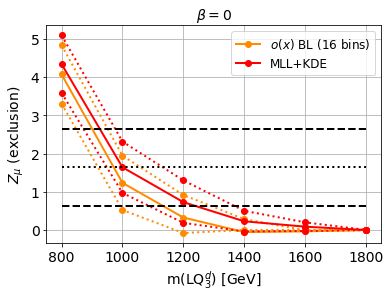

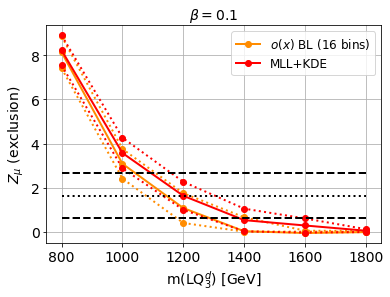

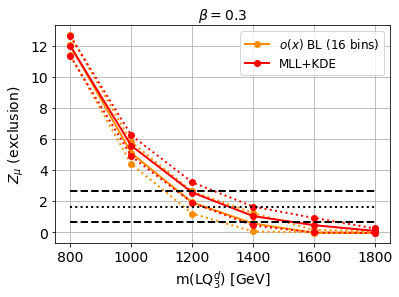

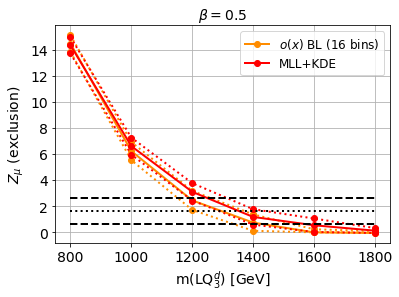

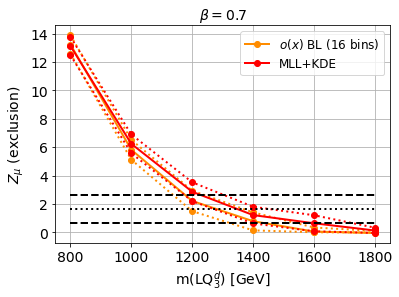

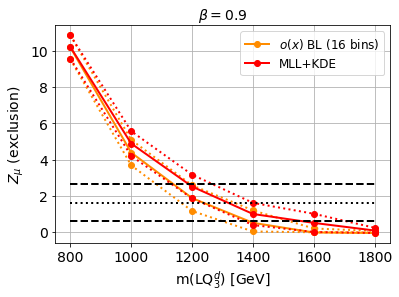

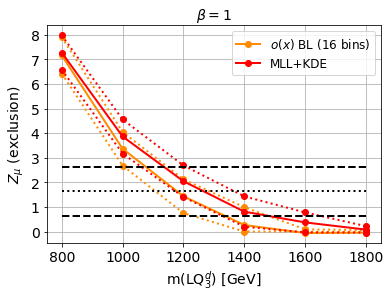

In [12]:
masses = [800, 1000, 1200, 1400, 1600, 1800]

Z164 = [1.64 for x in masses]
Z264 = [2.64 for x in masses]
Z064 = [0.64 for x in masses]

lw=2
plt.plot(masses, results_16bins_beta00, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta00, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta00, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta00, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta01, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta01, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta01, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta01, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta03, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta03, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta03, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta03, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.3$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta05, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta05, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta05, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta05, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.5$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta07, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta07, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta07, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta07, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.7$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta09, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta09, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta09, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta09, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 0.9$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()


plt.plot(masses, results_16bins_beta1, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(masses, results_16bins_plus_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_16bins_min_beta1, ':o', color='darkorange', lw=lw)
plt.plot(masses, results_MLL_KDE_beta1, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(masses, results_MLL_KDE_plus_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, results_MLL_KDE_min_beta1, ':o', color='red', lw=lw) 
plt.plot(masses, Z164, ':', color='black', lw=lw) 
plt.plot(masses, Z264, '--', color='black', lw=lw) 
plt.plot(masses, Z064, '--', color='black', lw=lw) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$\beta = 1$', fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.show()

### Interpolation

In [13]:
# Interpolation, cubic
res_f_16bins_beta00 = interp1d(masses, results_16bins_beta00, kind='quadratic')
res_f_16bins_plus_beta00 = interp1d(masses, results_16bins_plus_beta00, kind='quadratic')
res_f_16bins_min_beta00 = interp1d(masses, results_16bins_min_beta00, kind='quadratic')
res_f_MLL_KDE_beta00 = interp1d(masses, results_MLL_KDE_beta00, kind='quadratic')
res_f_MLL_KDE_plus_beta00 = interp1d(masses, results_MLL_KDE_plus_beta00, kind='quadratic')
res_f_MLL_KDE_min_beta00 = interp1d(masses, results_MLL_KDE_min_beta00, kind='quadratic')

res_f_16bins_beta01 = interp1d(masses, results_16bins_beta01, kind='quadratic')
res_f_16bins_plus_beta01 = interp1d(masses, results_16bins_plus_beta01, kind='quadratic')
res_f_16bins_min_beta01 = interp1d(masses, results_16bins_min_beta01, kind='quadratic')
res_f_MLL_KDE_beta01 = interp1d(masses, results_MLL_KDE_beta01, kind='quadratic')
res_f_MLL_KDE_plus_beta01 = interp1d(masses, results_MLL_KDE_plus_beta01, kind='quadratic')
res_f_MLL_KDE_min_beta01 = interp1d(masses, results_MLL_KDE_min_beta01, kind='quadratic')

res_f_16bins_beta03 = interp1d(masses, results_16bins_beta03, kind='quadratic')
res_f_16bins_plus_beta03 = interp1d(masses, results_16bins_plus_beta03, kind='quadratic')
res_f_16bins_min_beta03 = interp1d(masses, results_16bins_min_beta03, kind='quadratic')
res_f_MLL_KDE_beta03 = interp1d(masses, results_MLL_KDE_beta03, kind='quadratic')
res_f_MLL_KDE_plus_beta03 = interp1d(masses, results_MLL_KDE_plus_beta03, kind='quadratic')
res_f_MLL_KDE_min_beta03 = interp1d(masses, results_MLL_KDE_min_beta03, kind='quadratic')

res_f_16bins_beta05 = interp1d(masses, results_16bins_beta05, kind='quadratic')
res_f_16bins_plus_beta05 = interp1d(masses, results_16bins_plus_beta05, kind='quadratic')
res_f_16bins_min_beta05 = interp1d(masses, results_16bins_min_beta05, kind='quadratic')
res_f_MLL_KDE_beta05 = interp1d(masses, results_MLL_KDE_beta05, kind='quadratic')
res_f_MLL_KDE_plus_beta05 = interp1d(masses, results_MLL_KDE_plus_beta05, kind='quadratic')
res_f_MLL_KDE_min_beta05 = interp1d(masses, results_MLL_KDE_min_beta05, kind='quadratic')

res_f_16bins_beta07 = interp1d(masses, results_16bins_beta07, kind='quadratic')
res_f_16bins_plus_beta07 = interp1d(masses, results_16bins_plus_beta07, kind='quadratic')
res_f_16bins_min_beta07 = interp1d(masses, results_16bins_min_beta07, kind='quadratic')
res_f_MLL_KDE_beta07 = interp1d(masses, results_MLL_KDE_beta07, kind='quadratic')
res_f_MLL_KDE_plus_beta07 = interp1d(masses, results_MLL_KDE_plus_beta07, kind='quadratic')
res_f_MLL_KDE_min_beta07 = interp1d(masses, results_MLL_KDE_min_beta07, kind='quadratic')

res_f_16bins_beta09 = interp1d(masses, results_16bins_beta09, kind='quadratic')
res_f_16bins_plus_beta09 = interp1d(masses, results_16bins_plus_beta09, kind='quadratic')
res_f_16bins_min_beta09 = interp1d(masses, results_16bins_min_beta09, kind='quadratic')
res_f_MLL_KDE_beta09 = interp1d(masses, results_MLL_KDE_beta09, kind='quadratic')
res_f_MLL_KDE_plus_beta09 = interp1d(masses, results_MLL_KDE_plus_beta09, kind='quadratic')
res_f_MLL_KDE_min_beta09 = interp1d(masses, results_MLL_KDE_min_beta09, kind='quadratic')

res_f_16bins_beta1 = interp1d(masses, results_16bins_beta1, kind='quadratic')
res_f_16bins_plus_beta1 = interp1d(masses, results_16bins_plus_beta1, kind='quadratic')
res_f_16bins_min_beta1 = interp1d(masses, results_16bins_min_beta1, kind='quadratic')
res_f_MLL_KDE_beta1 = interp1d(masses, results_MLL_KDE_beta1, kind='quadratic')
res_f_MLL_KDE_plus_beta1 = interp1d(masses, results_MLL_KDE_plus_beta1, kind='quadratic')
res_f_MLL_KDE_min_beta1 = interp1d(masses, results_MLL_KDE_min_beta1, kind='quadratic')

In [14]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solvemass(fn, value, x=1000, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [15]:
beta = [0,0.1,0.3,0.5,0.7,0.9,1]


mass_16bins_beta00 = solvemass(res_f_16bins_beta00, 1.64)
mass_16bins_plus_beta00 = solvemass(res_f_16bins_plus_beta00, 1.64)
mass_16bins_min_beta00 = solvemass(res_f_16bins_min_beta00, 1.64)
mass_MLL_beta00 = solvemass(res_f_MLL_KDE_beta00, 1.64)
mass_MLL_plus_beta00 = solvemass(res_f_MLL_KDE_plus_beta00, 1.64)
mass_MLL_min_beta00 = solvemass(res_f_MLL_KDE_min_beta00, 1.64)

mass_16bins_beta01 = solvemass(res_f_16bins_beta01, 1.64)
mass_16bins_plus_beta01 = solvemass(res_f_16bins_plus_beta01, 1.64)
mass_16bins_min_beta01 = solvemass(res_f_16bins_min_beta01, 1.64)
mass_MLL_beta01 = solvemass(res_f_MLL_KDE_beta01, 1.64)
mass_MLL_plus_beta01 = solvemass(res_f_MLL_KDE_plus_beta01, 1.64)
mass_MLL_min_beta01 = solvemass(res_f_MLL_KDE_min_beta01, 1.64)

mass_16bins_beta03 = solvemass(res_f_16bins_beta03, 1.64)
mass_16bins_plus_beta03 = solvemass(res_f_16bins_plus_beta03, 1.64)
mass_16bins_min_beta03 = solvemass(res_f_16bins_min_beta03, 1.64)
mass_MLL_beta03 = solvemass(res_f_MLL_KDE_beta03, 1.64)
mass_MLL_plus_beta03 = solvemass(res_f_MLL_KDE_plus_beta03, 1.64)
mass_MLL_min_beta03 = solvemass(res_f_MLL_KDE_min_beta03, 1.64)

mass_16bins_beta05 = solvemass(res_f_16bins_beta05, 1.64)
mass_16bins_plus_beta05 = solvemass(res_f_16bins_plus_beta05, 1.64)
mass_16bins_min_beta05 = solvemass(res_f_16bins_min_beta05, 1.64)
mass_MLL_beta05 = solvemass(res_f_MLL_KDE_beta05, 1.64)
mass_MLL_plus_beta05 = solvemass(res_f_MLL_KDE_plus_beta05, 1.64)
mass_MLL_min_beta05 = solvemass(res_f_MLL_KDE_min_beta05, 1.64)

mass_16bins_beta07 = solvemass(res_f_16bins_beta07, 1.64)
mass_16bins_plus_beta07 = solvemass(res_f_16bins_plus_beta07, 1.64)
mass_16bins_min_beta07 = solvemass(res_f_16bins_min_beta07, 1.64)
mass_MLL_beta07 = solvemass(res_f_MLL_KDE_beta07, 1.64)
mass_MLL_plus_beta07 = solvemass(res_f_MLL_KDE_plus_beta07, 1.64)
mass_MLL_min_beta07 = solvemass(res_f_MLL_KDE_min_beta07, 1.64)

mass_16bins_beta09 = solvemass(res_f_16bins_beta09, 1.64)
mass_16bins_plus_beta09 = solvemass(res_f_16bins_plus_beta09, 1.64)
mass_16bins_min_beta09 = solvemass(res_f_16bins_min_beta09, 1.64)
mass_MLL_beta09 = solvemass(res_f_MLL_KDE_beta09, 1.64)
mass_MLL_plus_beta09 = solvemass(res_f_MLL_KDE_plus_beta09, 1.64)
mass_MLL_min_beta09 = solvemass(res_f_MLL_KDE_min_beta09, 1.64)

mass_16bins_beta1 = solvemass(res_f_16bins_beta1, 1.64)
mass_16bins_plus_beta1 = solvemass(res_f_16bins_plus_beta1, 1.64)
mass_16bins_min_beta1 = solvemass(res_f_16bins_min_beta1, 1.64)
mass_MLL_beta1 = solvemass(res_f_MLL_KDE_beta1, 1.64)
mass_MLL_plus_beta1 = solvemass(res_f_MLL_KDE_plus_beta1, 1.64)
mass_MLL_min_beta1 = solvemass(res_f_MLL_KDE_min_beta1, 1.64)

mass_16bins = [mass_16bins_beta00, mass_16bins_beta01, mass_16bins_beta03, mass_16bins_beta05, mass_16bins_beta07, mass_16bins_beta09, mass_16bins_beta1]
mass_16bins_plus = [mass_16bins_plus_beta00, mass_16bins_plus_beta01, mass_16bins_plus_beta03, mass_16bins_plus_beta05, mass_16bins_plus_beta07, mass_16bins_plus_beta09, mass_16bins_plus_beta1]
mass_16bins_min = [mass_16bins_min_beta00, mass_16bins_min_beta01, mass_16bins_min_beta03, mass_16bins_min_beta05, mass_16bins_min_beta07, mass_16bins_min_beta09, mass_16bins_min_beta1]
mass_MLL = [mass_MLL_beta00, mass_MLL_beta01, mass_MLL_beta03, mass_MLL_beta05, mass_MLL_beta07, mass_MLL_beta09, mass_MLL_beta1]
mass_MLL_plus = [mass_MLL_plus_beta00, mass_MLL_plus_beta01, mass_MLL_plus_beta03, mass_MLL_plus_beta05, mass_MLL_plus_beta07, mass_MLL_plus_beta09, mass_MLL_plus_beta1]
mass_MLL_min = [mass_MLL_min_beta00, mass_MLL_min_beta01, mass_MLL_min_beta03, mass_MLL_min_beta05, mass_MLL_min_beta07, mass_MLL_min_beta09, mass_MLL_min_beta1]

print(' LQ mass value such that Z = 1.64')
print(mass_16bins)
print(mass_16bins_plus)
print(mass_16bins_min)
print(mass_MLL)
print(mass_MLL_plus)
print(mass_MLL_min)

 LQ mass value such that Z = 1.64
[959.1162801336162, 1123.5407548279184, 1229.2002062155261, 1275.395546806912, 1257.40571740298, 1228.4785637433536, 1173.5032608587762]
[1037.498596880291, 1215.4395550717331, 1333.4376728211603, 1364.3253142756273, 1362.0234897418186, 1329.5400505513799, 1276.9198760836805]
[898.1516719413315, 1051.12538062498, 1160.3177941373083, 1206.7997304580256, 1187.282134748677, 1148.4468894196027, 1088.6364579091999]
[1000.371380576575, 1198.082402062677, 1303.3749861742092, 1337.3791049195593, 1330.2599274927663, 1302.3029001338996, 1257.2082650904654]
[1113.4596149173083, 1288.5702192206018, 1402.96582556273, 1422.4308853460145, 1434.7731689665013, 1396.4328555461575, 1359.1437923759831]
[931.336250907062, 1108.7821413631525, 1226.6936515645589, 1270.7416273366455, 1253.3348283135008, 1225.7484209093634, 1168.5179374965887]


In [16]:
# Expected ATLAS fig 9a https://www.hepdata.net/record/105998

beta_ATLAS = [0.0,0.0055605,0.010101,0.011175,0.016681,0.020202,0.02206,0.027174,0.030303,0.031929,0.036353,0.040404,0.040563,0.04484,0.049374,0.050505,0.054477,0.06021,0.060606,0.066647,0.070707,0.073462,0.080396,0.080808,0.087386,0.090909,0.094345,0.10101,0.10154,0.10947,0.11111,0.11841,0.12121,0.12873,0.13131,0.14064,0.14141,0.15152,0.15449,0.16162,0.17034,0.17172,0.18182,0.18895,0.19192,0.20202,0.21133,0.21212,0.22222,0.23232,0.23986,0.24242,0.25253,0.26263,0.27273,0.27806,0.28283,0.29293,0.30303,0.31313,0.32323,0.33188,0.33333,0.34343,0.35354,0.36364,0.37374,0.38384,0.39394,0.40404,0.41414,0.41599,0.42424,0.43434,0.44444,0.45455,0.46465,0.47475,0.48485,0.49495,0.50505,0.51515,0.52525,0.53535,0.54545,0.55556,0.56566,0.57576,0.58586,0.59596,0.60606,0.61616,0.62626,0.63636,0.64646,0.65657,0.66667,0.67677,0.68551,0.68687,0.69697,0.70707,0.71717,0.72727,0.73737,0.74747,0.75758,0.75862,0.76768,0.77778,0.78788,0.79798,0.79895,0.80808,0.81818,0.82745,0.82828,0.83838,0.84848,0.85245,0.85859,0.86869,0.87721,0.87879,0.88889,0.89899,0.90151,0.90909,0.91919,0.92359,0.92929,0.93939,0.94203,0.94949,0.95666,0.9596,0.96827,0.9697,0.97795,0.9798,0.9867,0.9899,0.99521,1.0]
mass_Z95CL_ATLAS = [771.93,787.88,800.86,804.04,820.2,830.76,836.36,852.53,863.22,868.69,884.85,900.42,901.01,917.17,933.33,937.08,949.49,965.66,966.72,981.82,991.76,997.98,1014.1,1015.2,1030.3,1038.8,1046.5,1061.5,1062.6,1078.8,1082.0,1094.9,1099.7,1111.1,1114.9,1127.3,1128.3,1140.3,1143.4,1151.2,1159.6,1161.0,1170.1,1175.8,1178.2,1185.7,1191.9,1192.5,1198.7,1204.3,1208.1,1209.4,1214.1,1218.4,1222.3,1224.2,1225.9,1229.3,1232.5,1235.4,1238.2,1240.4,1240.8,1243.2,1245.4,1247.5,1249.5,1251.4,1253.1,1254.8,1256.3,1256.6,1257.7,1258.9,1260.1,1261.1,1262.1,1262.9,1263.6,1264.3,1264.8,1265.2,1265.6,1265.8,1265.9,1265.9,1265.8,1265.6,1265.3,1264.9,1264.4,1263.8,1263.1,1262.3,1261.3,1260.3,1259.1,1257.8,1256.6,1256.4,1254.7,1252.9,1250.9,1248.7,1246.3,1243.6,1240.7,1240.4,1237.4,1233.6,1229.4,1224.7,1224.2,1219.6,1213.9,1208.1,1207.6,1201.5,1194.8,1191.9,1188.2,1181.7,1175.8,1174.8,1168.3,1161.4,1159.6,1154.3,1146.9,1143.4,1138.7,1129.7,1127.3,1119.3,1111.1,1107.2,1094.9,1092.7,1078.8,1075.5,1062.6,1056.7,1046.5,1037.4]

beta_ATLAS_plus1sig = [0, 0.013679890560875513, 0.024623803009575923, 0.04377564979480164, 0.06703146374829001, 0.10807113543091655, 0.1518467852257182, 0.18331053351573187, 0.2476060191518467, 0.3283173734610123, 0.4131326949384405, 0.49247606019151846, 0.5567715458276333, 0.6333789329685362, 0.6963064295485636, 0.759233926128591, 0.8221614227086184, 0.8645690834473324, 0.9069767441860465, 0.945280437756498, 0.9740082079343365, 1]
mass_Z95CL_ATLAS_plus1sig = [619.8852772466539, 700.9560229445507, 762.1414913957935, 824.8565965583174, 892.1606118546845, 980.8795411089866, 1043.5946462715106, 1084.8948374760994, 1124.6653919694072, 1149.1395793499044, 1169.0248565965583, 1176.6730401529635, 1176.6730401529635, 1172.0841300191205, 1162.906309751434, 1149.1395793499044, 1127.7246653919694, 1101.7208413001913, 1060.4206500956022, 1016.0611854684512, 965.5831739961759, 907.4569789674952]

beta_ATLAS_minus1sig = [0, 0.024623803009575923, 0.046511627906976744, 0.06703146374829001, 0.08755129958960328, 0.10807113543091655, 0.13406292749658003, 0.1709986320109439, 0.24213406292749656, 0.32694938440492477, 0.4131326949384405, 0.5047879616963065, 0.5882352941176471, 0.6716826265389877, 0.7400820793433652, 0.8084815321477428, 0.8618331053351573, 0.8946648426812586, 0.9151846785225718, 0.9343365253077975, 0.9740082079343365, 1]
mass_Z95CL_ATLAS_minus1sig = [846.2715105162524, 922.7533460803058, 1000.7648183556405, 1054.302103250478, 1107.8393881453155, 1152.1988527724666, 1196.5583173996174, 1239.3881453154877, 1280.6883365200765, 1302.1032504780114, 1318.9292543021033, 1323.5181644359463, 1326.5774378585086, 1321.9885277246653, 1312.810707456979, 1295.9847036328872, 1277.6290630975143, 1256.2141491395794, 1233.2695984703632, 1205.7361376673039, 1170.5544933078395, 1139.9617590822181]

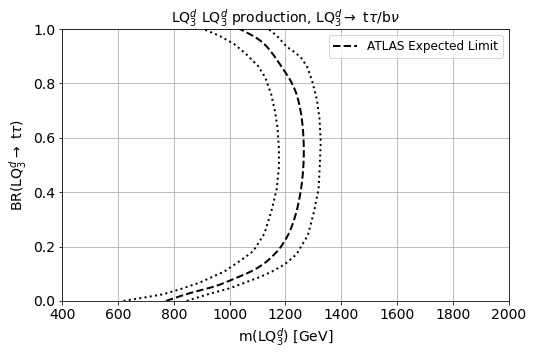

In [17]:
plt.figure(figsize = (8,5))
lw = 2
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 
plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

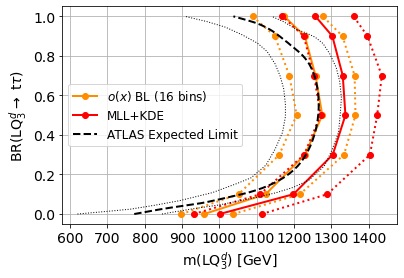

In [18]:
plt.figure()
lw = 2

plt.plot(mass_16bins, beta, '-o', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)')
plt.plot(mass_16bins_plus, beta, ':o', color='darkorange', lw=lw) 
plt.plot(mass_16bins_min, beta, ':o', color='darkorange', lw=lw)
plt.plot(mass_MLL, beta, '-o', color='red', lw=lw, label=r'MLL+KDE') 
plt.plot(mass_MLL_plus, beta, ':o', color='red', lw=lw) 
plt.plot(mass_MLL_min, beta, ':o', color='red', lw=lw) 
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=1) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=1) 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
#plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(fontsize=12)
plt.show()

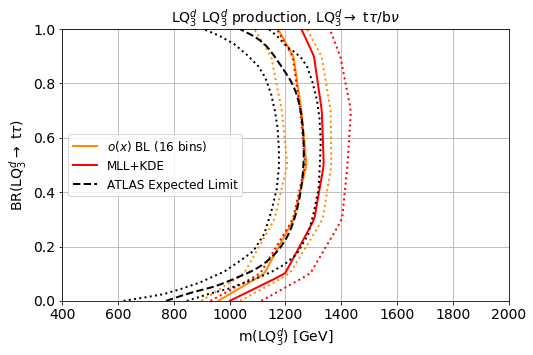

In [19]:
mass_Z95CL_16bins = interp1d(beta, mass_16bins, kind='linear')
mass_Z95CL_16bins_plus = interp1d(beta, mass_16bins_plus, kind='linear')
mass_Z95CL_16bins_min = interp1d(beta, mass_16bins_min, kind='linear')
mass_Z95CL_MLL = interp1d(beta, mass_MLL, kind='linear')
mass_Z95CL_MLL_plus = interp1d(beta, mass_MLL_plus, kind='linear')
mass_Z95CL_MLL_min = interp1d(beta, mass_MLL_min, kind='linear')

plotX_beta = np.linspace(min(beta), max(beta), num=50, endpoint=True)

#plt.figure()
plt.figure(figsize = (8,5))
lw = 2

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='darkorange', lw=lw, label=r'$o(x)$ BL (16 bins)') 
plt.plot(mass_Z95CL_16bins_plus(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_16bins_min(plotX_beta), plotX_beta, ':', color='darkorange', lw=lw)
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'MLL+KDE')
plt.plot(mass_Z95CL_MLL_plus(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_MLL_min(plotX_beta), plotX_beta, ':', color='red', lw=lw)
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '--', color='black', lw=lw, label=r'ATLAS Expected Limit') 
plt.plot(mass_Z95CL_ATLAS_plus1sig, beta_ATLAS_plus1sig, ':', color='black', lw=2) 
plt.plot(mass_Z95CL_ATLAS_minus1sig, beta_ATLAS_minus1sig, ':', color='black', lw=2) 

plt.xlim([400, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(fontsize=12)
plt.show()

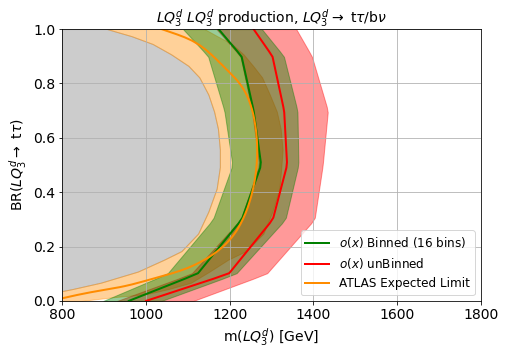

In [20]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '-', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.xlim([800, 1800])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m($LQ_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR($LQ_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$LQ_3^d$ $LQ_3^d$ production, $LQ_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(loc = 'lower right', fontsize=12)
plt.savefig('exclusion_LQdown.pdf', bbox_inches='tight')
plt.show()

In [21]:
# BR values
print(plotX_beta)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


In [22]:
# Mass values (BL)
print( mass_Z95CL_16bins(plotX_beta) )
print( mass_Z95CL_16bins_plus(plotX_beta) )
print( mass_Z95CL_16bins_min(plotX_beta) )

[ 959.11628013  992.67229538 1026.22831062 1059.78432586 1093.34034111
 1124.6189125  1135.40048917 1146.18206584 1156.96364251 1167.74521918
 1178.52679586 1189.30837253 1200.0899492  1210.87152587 1221.65310254
 1230.61434929 1235.32815956 1240.04196982 1244.75578009 1249.46959035
 1254.18340062 1258.89721088 1263.61102115 1268.32483141 1273.03864167
 1274.47769837 1272.64200149 1270.80630461 1268.97060773 1267.13491086
 1265.29921398 1263.4635171  1261.62782022 1259.79212334 1257.95642647
 1255.33949214 1252.38774177 1249.43599139 1246.48424102 1243.53249065
 1240.58074027 1237.6289899  1234.67723953 1231.72548915 1228.77373878
 1218.38105913 1207.16160956 1195.94216    1184.72271043 1173.50326086]
[1037.49859688 1073.81307814 1110.12755941 1146.44204067 1182.75652193
 1216.6436175  1228.68424176 1240.72486602 1252.76549028 1264.80611454
 1276.8467388  1288.88736306 1300.92798732 1312.96861158 1325.00923584
 1334.38321287 1337.53501301 1340.68681316 1343.83861331 1346.99041346
 1350

In [23]:
# Mass values (MLL)
print( mass_Z95CL_MLL(plotX_beta) )
print( mass_Z95CL_MLL_plus(plotX_beta) )
print( mass_Z95CL_MLL_min(plotX_beta) )

[1000.37138058 1040.72056863 1081.06975669 1121.41894475 1161.76813281
 1199.15681619 1209.90095742 1220.64509866 1231.38923989 1242.13338113
 1252.87752237 1263.6216636  1274.36580484 1285.10994607 1295.85408731
 1304.41592858 1307.88573662 1311.35554466 1314.82535269 1318.29516073
 1321.76496876 1325.2347768  1328.70458483 1332.17439287 1335.6442009
 1337.01588158 1336.28943491 1335.56298823 1334.83654155 1334.11009488
 1333.3836482  1332.65720152 1331.93075485 1331.20430817 1330.4778615
 1328.26299697 1325.41023907 1322.55748118 1319.70472329 1316.85196539
 1313.9992075  1311.1464496  1308.29369171 1305.44093382 1302.58817592
 1294.02021206 1284.81722532 1275.61423858 1266.41125183 1257.20826509]
[1113.45961492 1149.19647294 1184.93333096 1220.67018898 1256.407047
 1289.73752133 1301.41054238 1313.08356344 1324.75658449 1336.42960555
 1348.1026266  1359.77564766 1371.44866871 1383.12168977 1394.79471082
 1403.56169474 1405.54792533 1407.53415592 1409.52038651 1411.5066171
 1413.4928

### Plot with the 300 and 3000 fb-1 limits

In [19]:
# RESULTS FROM LQdown at 300 fb #

mass_Z95CL_16bins_300 = [1084.5311035 , 1136.83999537, 1189.14888725, 1241.45777913,
       1293.766671  , 1342.12417279, 1354.91916384, 1367.71415488,
       1380.50914593, 1393.30413697, 1406.09912801, 1418.89411906,
       1431.6891101 , 1444.48410114, 1457.27909219, 1467.4997254 ,
       1471.71352365, 1475.9273219 , 1480.14112016, 1484.35491841,
       1488.56871666, 1492.78251492, 1496.99631317, 1501.21011142,
       1505.42390967, 1506.97323729, 1505.85809426, 1504.74295123,
       1503.6278082 , 1502.51266517, 1501.39752214, 1500.28237911,
       1499.16723608, 1498.05209305, 1496.93695002, 1492.6438803 ,
       1486.98884199, 1481.33380369, 1475.67876538, 1470.02372708,
       1464.36868877, 1458.71365047, 1453.05861216, 1447.40357386,
       1441.74853555, 1406.29282459, 1367.52592777, 1328.75903096,
       1289.99213414, 1251.22523732]
mass_Z95CL_16bins_plus_300 = [1154.70145533, 1218.78172568, 1282.86199604, 1346.94226639,
       1411.02253675, 1469.85225265, 1481.42697843, 1493.00170422,
       1504.57643001, 1516.1511558 , 1527.72588159, 1539.30060738,
       1550.87533317, 1562.45005896, 1574.02478475, 1583.47775105,
       1587.97994522, 1592.48213939, 1596.98433356, 1601.48652773,
       1605.9887219 , 1610.49091607, 1614.99311024, 1619.49530441,
       1623.99749858, 1625.90616147, 1625.22129307, 1624.53642468,
       1623.85155628, 1623.16668789, 1622.48181949, 1621.7969511 ,
       1621.11208271, 1620.42721431, 1619.74234592, 1616.50139161,
       1612.16497191, 1607.8285522 , 1603.4921325 , 1599.1557128 ,
       1594.8192931 , 1590.4828734 , 1586.14645369, 1581.81003399,
       1577.47361429, 1541.88483739, 1502.82357636, 1463.76231533,
       1424.7010543 , 1385.63979326]
mass_Z95CL_16bins_min_300 = [1022.51441741, 1067.37428139, 1112.23414537, 1157.09400936,
       1201.95387334, 1243.76577197, 1258.14598245, 1272.52619294,
       1286.90640342, 1301.2866139 , 1315.66682439, 1330.04703487,
       1344.42724536, 1358.80745584, 1373.18766632, 1384.45928598,
       1388.47752703, 1392.49576809, 1396.51400914, 1400.53225019,
       1404.55049124, 1408.5687323 , 1412.58697335, 1416.6052144 ,
       1420.62345546, 1422.02195523, 1420.80071373, 1419.57947222,
       1418.35823072, 1417.13698921, 1415.91574771, 1414.6945062 ,
       1413.4732647 , 1412.25202319, 1411.03078168, 1406.38482959,
       1400.27114438, 1394.15745918, 1388.04377397, 1381.93008876,
       1375.81640356, 1369.70271835, 1363.58903314, 1357.47534794,
       1351.36166273, 1321.82464491, 1289.68503458, 1257.54542425,
       1225.40581392, 1193.26620359]

mass_Z95CL_MLL_300 = [1143.41961082, 1209.53678431, 1275.65395781, 1341.7711313 ,
       1407.88830479, 1468.531726  , 1479.91137663, 1491.29102726,
       1502.67067789, 1514.05032852, 1525.42997915, 1536.80962978,
       1548.18928041, 1559.56893104, 1570.94858167, 1580.27217401,
       1584.79829702, 1589.32442002, 1593.85054302, 1598.37666603,
       1602.90278903, 1607.42891204, 1611.95503504, 1616.48115804,
       1621.00728105, 1622.93610503, 1622.26762999, 1621.59915495,
       1620.93067991, 1620.26220486, 1619.59372982, 1618.92525478,
       1618.25677974, 1617.5883047 , 1616.91982966, 1613.65410111,
       1609.27526393, 1604.89642675, 1600.51758956, 1596.13875238,
       1591.7599152 , 1587.38107801, 1583.00224083, 1578.62340365,
       1574.24456647, 1539.25097821, 1500.85575094, 1462.46052367,
       1424.0652964 , 1385.67006913]
mass_Z95CL_MLL_plus_300 = [1258.95627787, 1326.11411487, 1393.27195186, 1460.42978886,
       1527.58762585, 1589.12832033, 1600.11473218, 1611.10114402,
       1622.08755586, 1633.07396771, 1644.06037955, 1655.04679139,
       1666.03320324, 1677.01961508, 1688.00602692, 1696.71188975,
       1700.09647153, 1703.48105332, 1706.8656351 , 1710.25021689,
       1713.63479867, 1717.01938046, 1720.40396224, 1723.78854403,
       1727.17312581, 1728.73893245, 1728.48596395, 1728.23299544,
       1727.98002694, 1727.72705843, 1727.47408993, 1727.22112142,
       1726.96815292, 1726.71518441, 1726.46221591, 1724.45259304,
       1721.69011829, 1718.92764355, 1716.1651688 , 1713.40269406,
       1710.64021931, 1707.87774457, 1705.11526982, 1702.35279508,
       1699.59032033, 1666.21583637, 1629.44001805, 1592.66419973,
       1555.88838141, 1519.11256309]
mass_Z95CL_MLL_min_300 = [1083.47428348, 1140.80449648, 1198.13470947, 1255.46492246,
       1312.79513546, 1365.68794863, 1378.64416344, 1391.60037825,
       1404.55659305, 1417.51280786, 1430.46902267, 1443.42523747,
       1456.38145228, 1469.33766709, 1482.2938819 , 1492.80936106,
       1497.62979037, 1502.45021969, 1507.27064901, 1512.09107832,
       1516.91150764, 1521.73193696, 1526.55236627, 1531.37279559,
       1536.19322491, 1538.09854626, 1537.08875966, 1536.07897305,
       1535.06918645, 1534.05939984, 1533.04961324, 1532.03982663,
       1531.03004003, 1530.02025342, 1529.01046682, 1524.18182363,
       1517.71652762, 1511.25123161, 1504.7859356 , 1498.32063959,
       1491.85534358, 1485.39004756, 1478.92475155, 1472.45945554,
       1465.99415953, 1430.4823576 , 1391.74316612, 1353.00397464,
       1314.26478316, 1275.52559168]

In [20]:
# RESULTS FROM LQdown at 3000 fb #

mass_Z95CL_16bins_3000 = [1123.        , 1194.16240724, 1265.32481447, 1336.48722171,
       1407.64962895, 1472.85493344, 1484.44631325, 1496.03769307,
       1507.62907288, 1519.2204527 , 1530.81183251, 1542.40321233,
       1553.99459214, 1565.58597195, 1577.17735177, 1586.80426932,
       1591.84744161, 1596.89061389, 1601.93378617, 1606.97695846,
       1612.02013074, 1617.06330303, 1622.10647531, 1627.14964759,
       1632.19281988, 1634.3177937 , 1633.52456905, 1632.73134441,
       1631.93811977, 1631.14489512, 1630.35167048, 1629.55844584,
       1628.76522119, 1627.97199655, 1627.17877191, 1623.62805361,
       1618.89555231, 1614.16305101, 1609.43054971, 1604.69804842,
       1599.96554712, 1595.23304582, 1590.50054453, 1585.76804323,
       1581.03554193, 1545.92629446, 1507.44185296, 1468.95741147,
       1430.47296998, 1391.98852849]
mass_Z95CL_16bins_plus_3000 = [1235.47205805, 1306.51727257, 1377.56248709, 1448.60770161,
       1519.65291612, 1584.83671292, 1597.26775018, 1609.69878743,
       1622.12982469, 1634.56086195, 1646.99189921, 1659.42293647,
       1671.85397373, 1684.28501099, 1696.71604825, 1707.30646571,
       1713.60210366, 1719.89774161, 1726.19337955, 1732.4890175 ,
       1738.78465545, 1745.08029339, 1751.37593134, 1757.67156929,
       1763.96720723, 1767.23921149, 1767.48758207, 1767.73595264,
       1767.98432321, 1768.23269379, 1768.48106436, 1768.72943493,
       1768.97780551, 1769.22617608, 1769.47454665, 1765.15432615,
       1758.87613805, 1752.59794994, 1746.31976184, 1740.04157373,
       1733.76338563, 1727.48519752, 1721.20700942, 1714.92882131,
       1708.65063321, 1669.90041353, 1627.54219035, 1585.18396716,
       1542.82574397, 1500.46752079]
mass_Z95CL_16bins_min_3000 = [1072.        , 1138.03041374, 1204.06082748, 1270.09124122,
       1336.12165496, 1396.73546149, 1408.59980315, 1420.46414482,
       1432.32848648, 1444.19282814, 1456.05716981, 1467.92151147,
       1479.78585314, 1491.6501948 , 1503.51453646, 1513.17877948,
       1517.70945898, 1522.24013849, 1526.77081799, 1531.3014975 ,
       1535.832177  , 1540.36285651, 1544.89353601, 1549.42421552,
       1553.95489502, 1555.70247596, 1554.66695831, 1553.63144067,
       1552.59592303, 1551.56040539, 1550.52488775, 1549.4893701 ,
       1548.45385246, 1547.41833482, 1546.38281718, 1542.22864718,
       1536.73791189, 1531.2471766 , 1525.75644132, 1520.26570603,
       1514.77497074, 1509.28423545, 1503.79350016, 1498.30276487,
       1492.81202958, 1459.92431602, 1423.99249375, 1388.06067149,
       1352.12884923, 1316.19702696]

mass_Z95CL_MLL_3000 = [1343.54410601, 1415.98291935, 1488.42173269, 1560.86054603,
       1633.29935937, 1699.33769659, 1707.77174867, 1716.20580076,
       1724.63985285, 1733.07390493, 1741.50795702, 1749.94200911,
       1758.37606119, 1766.81011328, 1775.24416537, 1782.15955032,
       1785.53137864, 1788.90320696, 1792.27503528, 1795.6468636 ,
       1799.01869192, 1802.39052024, 1805.76234856, 1809.13417687,
       1812.50600519, 1814.4456022 , 1814.9529679 , 1815.4603336 ,
       1815.96769931, 1816.47506501, 1816.98243071, 1817.48979641,
       1817.99716211, 1818.50452781, 1819.01189351, 1816.11872027,
       1811.7681732 , 1807.41762613, 1803.06707906, 1798.716532  ,
       1794.36598493, 1790.01543786, 1785.66489079, 1781.31434372,
       1776.96379665, 1748.12637391, 1716.5681872 , 1685.01000049,
       1653.45181379, 1621.89362708]
mass_Z95CL_MLL_plus_3000 = [1476.84596418, 1544.3650718 , 1611.88417942, 1679.40328704,
       1746.92239466, 1808.04780209, 1811.62990781, 1815.21201354,
       1818.79411927, 1822.37622499, 1825.95833072, 1829.54043645,
       1833.12254218, 1836.7046479 , 1840.28675363, 1843.45968389,
       1845.67787141, 1847.89605892, 1850.11424643, 1852.33243394,
       1854.55062145, 1856.76880896, 1858.98699648, 1861.20518399,
       1863.4233715 , 1864.97513351, 1865.86047002, 1866.74580653,
       1867.63114304, 1868.51647955, 1869.40181606, 1870.28715257,
       1871.17248907, 1872.05782558, 1872.94316209, 1870.58541688,
       1866.83777951, 1863.09014214, 1859.34250476, 1855.59486739,
       1851.84723002, 1848.09959264, 1844.35195527, 1840.60431789,
       1836.85668052, 1819.13119977, 1799.85262531, 1780.57405085,
       1761.29547639, 1742.01690193]
mass_Z95CL_MLL_min_3000 = [1269.25932849, 1341.1435437 , 1413.0277589 , 1484.91197411,
       1556.79618931, 1622.45479933, 1632.0829626 , 1641.71112587,
       1651.33928914, 1660.96745241, 1670.59561569, 1680.22377896,
       1689.85194223, 1699.4801055 , 1709.10826878, 1717.28182279,
       1722.06128855, 1726.84075431, 1731.62022007, 1736.39968583,
       1741.17915159, 1745.95861735, 1750.73808311, 1755.51754887,
       1760.29701463, 1762.74622929, 1762.86519286, 1762.98415642,
       1763.10311998, 1763.22208354, 1763.34104711, 1763.46001067,
       1763.57897423, 1763.69793779, 1763.81690136, 1760.3587777 ,
       1755.36761667, 1750.37645563, 1745.3852946 , 1740.39413356,
       1735.40297253, 1730.4118115 , 1725.42065046, 1720.42948943,
       1715.43832839, 1683.33031146, 1648.20931053, 1613.08830961,
       1577.96730868, 1542.84630776]

In [21]:
dummy = [1,3]

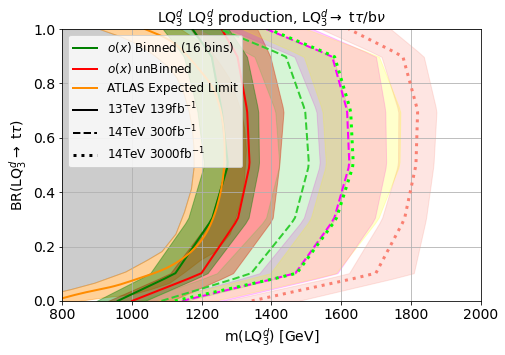

In [30]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})

test300 = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus_300,
                      'MLL_up': mass_Z95CL_MLL_min_300,
                     '16bins_low': mass_Z95CL_16bins_plus_300,
                      '16bins_up': mass_Z95CL_16bins_min_300})

colorsnum300 = pd.DataFrame({'BR': [0],
                    'MLL_low': [1],
                      'MLL_up': [1],
                     '16bins_low': [2],
                      '16bins_up': [2]})
colorsset300 = ['darkorange', 'magenta', 'limegreen']

test3000 = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus_3000,
                      'MLL_up': mass_Z95CL_MLL_min_3000,
                     '16bins_low': mass_Z95CL_16bins_plus_3000,
                      '16bins_up': mass_Z95CL_16bins_min_3000})

colorsnum3000 = pd.DataFrame({'BR': [0],
                    'MLL_low': [1],
                      'MLL_up': [1],
                     '16bins_low': [2],
                      '16bins_up': [2]})
colorsset3000 = ['darkorange', 'salmon', 'lime']

mineral_names = test.columns[1:]
mineral_names300 = test300.columns[1:]
mineral_names3000 = test3000.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
for mineral_name300 in mineral_names300[:-1]:
    ax.plot(test300[mineral_name300], test300['BR'], linewidth=2, color='None')#,'-.', linewidth=2, color=colorsset300[colorsnum300[mineral_name300].tolist()[0]])

for mineral_name3000 in mineral_names3000[:-1]:
    ax.plot(test3000[mineral_name3000], test3000['BR'], linewidth=2, color='None')#,':', linewidth=2, color=colorsset3000[colorsnum3000[mineral_name3000].tolist()[0]])
  
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
colors300 = [ "None", "magenta", "None", "limegreen", "None"]
previous_curve300 = 0
previous_name300 = ''
for mineral_name300, color300 in zip(mineral_names300, colors300):
    ax.fill_betweenx(test300['BR'], previous_curve300, test300[mineral_name300], color=color300, alpha=0.2)
    previous_curve300 = test300[mineral_name300]
    previous_name300 = mineral_name300
    
colors3000 = [ "None", "salmon", "None", "yellow", "None"]
previous_curve3000 = 0
previous_name3000 = ''
for mineral_name3000, color3000 in zip(mineral_names3000, colors3000):
    ax.fill_betweenx(test3000['BR'], previous_curve3000, test3000[mineral_name3000], color=color3000, alpha=0.2)
    previous_curve3000 = test3000[mineral_name3000]
    previous_name3000 = mineral_name3000
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '-', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.plot(mass_Z95CL_16bins_300, plotX_beta, '--', color='limegreen', lw=lw)#, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_300, plotX_beta, '--', color='magenta', lw=lw)#, label=r'$o(x)$ unBinned')

plt.plot(mass_Z95CL_16bins_3000, plotX_beta, ':', color='lime', lw=3)#, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_3000, plotX_beta, ':', color='salmon', lw=3)#, label=r'$o(x)$ unBinned')

plt.plot(dummy, dummy, '-', color='black', lw=lw, label=r'13TeV 139fb$^{-1}$') 
plt.plot(dummy, dummy, '--', color='black', lw=lw, label=r'14TeV 300fb$^{-1}$') 
plt.plot(dummy, dummy, ':', color='black', lw=3, label=r'14TeV 3000fb$^{-1}$') 

plt.xlim([800, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m(LQ$_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR(LQ$_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'LQ$_3^d$ LQ$_3^d$ production, LQ$_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
#plt.legend(loc = 'lower right', fontsize=12)
#plt.legend( fontsize=12)
#plt.savefig('exclusion_LQdown_limits.pdf', bbox_inches='tight')
plt.show()

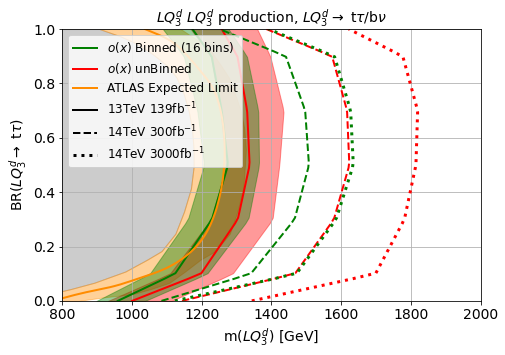

In [23]:

#plt.figure()
lw = 2

test_A = pd.DataFrame({'ATLAS_beta': beta_ATLAS_plus1sig,
                     'ATLAS_low':mass_Z95CL_ATLAS_plus1sig,
                     'ATLAS_up':mass_Z95CL_ATLAS_minus1sig})


test = pd.DataFrame({'BR': plotX_beta.tolist(),
                    'MLL_low': mass_Z95CL_MLL_plus(plotX_beta).tolist(),
                      'MLL_up': mass_Z95CL_MLL_min(plotX_beta).tolist(),
                     '16bins_low': mass_Z95CL_16bins_plus(plotX_beta).tolist(),
                      '16bins_up': mass_Z95CL_16bins_min(plotX_beta).tolist()})
mineral_names = test.columns[1:]

fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(nrows=1, ncols=4, wspace=0)

ax = fig.add_subplot(gs[0, 1])
for mineral_name in mineral_names[:-1]:
    ax.plot(test[mineral_name], test['BR'], linewidth=2, color='None')
    
    
ax.fill_betweenx(test_A['ATLAS_beta'], 0, test_A['ATLAS_low'], color='gray', alpha=0.4)
ax.fill_betweenx(test_A['ATLAS_beta'], test_A['ATLAS_low'], test_A['ATLAS_up'], color='darkorange', alpha=0.4)

colors = [ "None", "red", "None", "green", "None"]
previous_curve = 0
previous_name = ''
for mineral_name, color in zip(mineral_names, colors):
    ax.fill_betweenx(test['BR'], previous_curve, test[mineral_name], color=color, alpha=0.4)
    previous_curve = test[mineral_name]
    previous_name = mineral_name
    
    
    

plt.plot(mass_Z95CL_16bins(plotX_beta), plotX_beta, '-', color='green', lw=lw, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL(plotX_beta), plotX_beta, '-', color='red', lw=lw, label=r'$o(x)$ unBinned')
plt.plot(mass_Z95CL_ATLAS, beta_ATLAS, '-', color='darkorange', lw=lw, label=r'ATLAS Expected Limit') 

plt.plot(mass_Z95CL_16bins_300, plotX_beta, '--', color='green', lw=lw)#, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_300, plotX_beta, '--', color='red', lw=lw)#, label=r'$o(x)$ unBinned')

plt.plot(mass_Z95CL_16bins_3000, plotX_beta, ':', color='green', lw=3)#, label=r'$o(x)$ Binned (16 bins)') 
plt.plot(mass_Z95CL_MLL_3000, plotX_beta, ':', color='red', lw=3)#, label=r'$o(x)$ unBinned')

plt.plot(dummy, dummy, '-', color='black', lw=lw, label=r'13TeV 139fb$^{-1}$') 
plt.plot(dummy, dummy, '--', color='black', lw=lw, label=r'14TeV 300fb$^{-1}$') 
plt.plot(dummy, dummy, ':', color='black', lw=3, label=r'14TeV 3000fb$^{-1}$') 

plt.xlim([800, 2000])
plt.ylim([0., 1])
#plt.xscale('log')
plt.xlabel('m($LQ_3^d$) [GeV]', fontsize=14)
plt.ylabel(r'BR($LQ_3^d \rightarrow$ t$\tau$)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title(r'$LQ_3^d$ $LQ_3^d$ production, $LQ_3^d \rightarrow$ t$\tau$/b$\nu$', fontsize=14)
plt.legend(loc = 'upper left', fontsize=12)
plt.savefig('exclusion_LQdown_limits.pdf', bbox_inches='tight')
plt.show()